<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Reading-input" data-toc-modified-id="Reading-input-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading input</a></span></li><li><span><a href="#General-statistics" data-toc-modified-id="General-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>General statistics</a></span><ul class="toc-item"><li><span><a href="#Time-elapsed-for-each-set" data-toc-modified-id="Time-elapsed-for-each-set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Time elapsed for each set</a></span></li><li><span><a href="#Statistics-for-each-set" data-toc-modified-id="Statistics-for-each-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Statistics for each set</a></span></li></ul></li><li><span><a href="#Service" data-toc-modified-id="Service-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Service</a></span><ul class="toc-item"><li><span><a href="#Extending-on-the-services" data-toc-modified-id="Extending-on-the-services-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extending on the services</a></span></li><li><span><a href="#Service-Faults" data-toc-modified-id="Service-Faults-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Service Faults</a></span></li></ul></li><li><span><a href="#Backhands-and-Forehands" data-toc-modified-id="Backhands-and-Forehands-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Backhands and Forehands</a></span><ul class="toc-item"><li><span><a href="#Extending-on-backhand-and-forehand-statistics" data-toc-modified-id="Extending-on-backhand-and-forehand-statistics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Extending on backhand and forehand statistics</a></span></li></ul></li><li><span><a href="#Errors" data-toc-modified-id="Errors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Errors</a></span></li><li><span><a href="#Corelation-between-rally-length-and-player" data-toc-modified-id="Corelation-between-rally-length-and-player-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Corelation between rally length and player</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#About-the-game" data-toc-modified-id="About-the-game-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>About the game</a></span></li><li><span><a href="#What's-next?" data-toc-modified-id="What's-next?-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>What's next?</a></span></li></ul></li></ul></div>

# Introduction

In cooperation with Enetel Solutions, Foundley organised a number of projects for students. This one was one of them and I participated. I was given a .csv file with Wimbledon 2019 match statistics between Novak Djokovic and Roger Federer. Our task was to do exploratory data analysis with python and it was named "Tennis and Data Science".

# Reading input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing CSV file
data = pd.read_csv('03_tennisai_data.csv')
data.head()

,match_id,frame_pos,p1,p1_sets,p1_games,p1_points,p1_set1,p1_set2,p1_set3,p1_set4,...,lob,rally_length,rally_1-4,rally_5-8,rally_9+,expected_ballhit_count,detected_ballhit_count,game_id,point_description,strokes_timestamps
0,3,350,djokovic,0,0,0,-1,-1,-1,-1,...,0,1,1,0,0,1,1,0,"1st serve wide, ace.",[26.192]
1,3,975,djokovic,0,0,0,-1,-1,-1,-1,...,0,2,1,0,0,3,3,0,"1st serve wide, fault (net). 2nd serve to body...","[41.239, 49.412, 50.341]"
2,3,1425,djokovic,0,0,0,-1,-1,-1,-1,...,0,3,1,0,0,3,3,0,1st serve wide; forehand return down the middl...,"[65.945, 66.688, 67.802]"
3,3,1850,djokovic,0,0,15,-1,-1,-1,-1,...,0,1,1,0,0,1,2,0,"1st serve down the T, ace.","[85.264, 86.378]"
4,3,2275,djokovic,0,0,15,-1,-1,-1,-1,...,0,3,1,0,0,4,4,0,"1st serve wide, fault (net). 2nd serve down th...","[101.053, 109.97, 110.899, 112.385]"


First task was obviously to read .csv extension and see if there is any errors in the file. My first idea that came to mind was to calculate number of few important plays for each player, which I did.

# General statistics

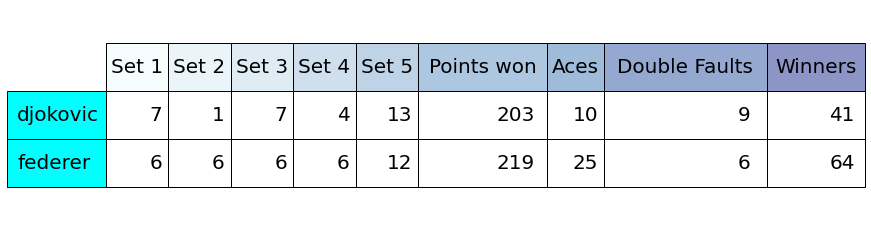

In [2]:
results_data = []
players = ["djokovic", "federer"]

def get_results(num):
    row = []
    p = "p" + num + "_"
        
    for i in range(1,5):
        row.append(data[p + "set" + str(i)].iloc[-1])
        
    last_set = data[p+"games"].iloc[-1]
    if (data["pt_won_by"].iloc[-1] -1 == int(num)):
        last_set += 1
    row.append(last_set)
    
    points, aces, doubles, winners = 0, 0, 0, 0
    for i in range(data.shape[0]):
        if data["pt_won_by"][i] == int(num):
            points += 1
        if data["ace"][i] == int(num):
            aces += 1
        if data["double_fault"][i] == int(num):
            doubles += 1
        if data["winner"][i] == int(num):
            winners += 1
            
    row.append(points)
    row.append(aces)
    row.append(doubles)
    row.append(winners)
    return row

# For each players return r t results and number of points, aces, double faults and winners that player got in the game
for p in players:
    row = []
    if p == 'djokovic':
        row = get_results('1')
    else:
        row = get_results('2')
    results_data.append(row)

results_col = ('Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5', 'Points won', 'Aces', 'Double Faults', 'Winners')
results_row = players

# Plot table
col_colors = plt.cm.BuPu(np.linspace(0, 0.5, len(results_col)))
fig, ax =plt.subplots(1,1)
ax.axis('off')
plot_table = ax.table(cellText=results_data, rowLabels=results_row, colLabels=results_col, loc="center", rowColours = ["cyan"] * 3,
        colColours = col_colors)
plot_table.set_fontsize(20)
plot_table.scale(1, 4)
plot_table.auto_set_column_width(col=list(range(len(results_col))))
plt.show()


It is quite suprising that Djokovic won this game, even if he loses to Federer compared with points won, double faults, aces and winners. I then asked myself, was Federer better because he had one-two sets which he outplayed Djokovic by a big margin? But I wanted to focus more one general statistics, so I left that for a pause. 

## Time elapsed for each set

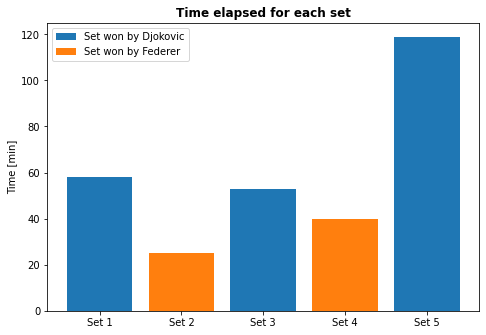

In [3]:
# Extract time elapsed for each set

# Extracting frames that each set ended
set_times = []
set_ind = []
last = 0
for i in range(data.shape[0]):
    if (data["p1_set" + str(len(set_times) + 1)][i] != -1  or data.shape[0]-1 == i):
        set_times.append(last)
        set_ind.append(i)
    last = data["frame_pos"][i]
    
# Preparing for plotting, converting to minutes and diving djokovic's/federer's sets 
duration_1 = []
last = 0
duration_2 = []
for i in range(len(set_times)):
    duration_1.append(round((set_times[i] - last) / 25 / 60))
    if (results_data[1][i] > results_data[0][i]):
        duration_2.append(round((set_times[i] - last) / 25 / 60))
    else:
        duration_2.append(0)
    last = set_times[i]
    
# Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sets = ('Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5')
ax.bar(sets,duration_1)
ax.bar(sets,duration_2)
ax.set_ylabel('Time [min]')
ax.set_title('Time elapsed for each set', fontweight = 'bold')



ax.legend(labels=['Set won by Djokovic', 'Set won by Federer'])

plt.show()

We saw that Federer outplayed Djokovic really fast on the 2nd set and the 5th one was a big struggle for the players. As I noticed that, I went searching for the answers set by set.

## Statistics for each set

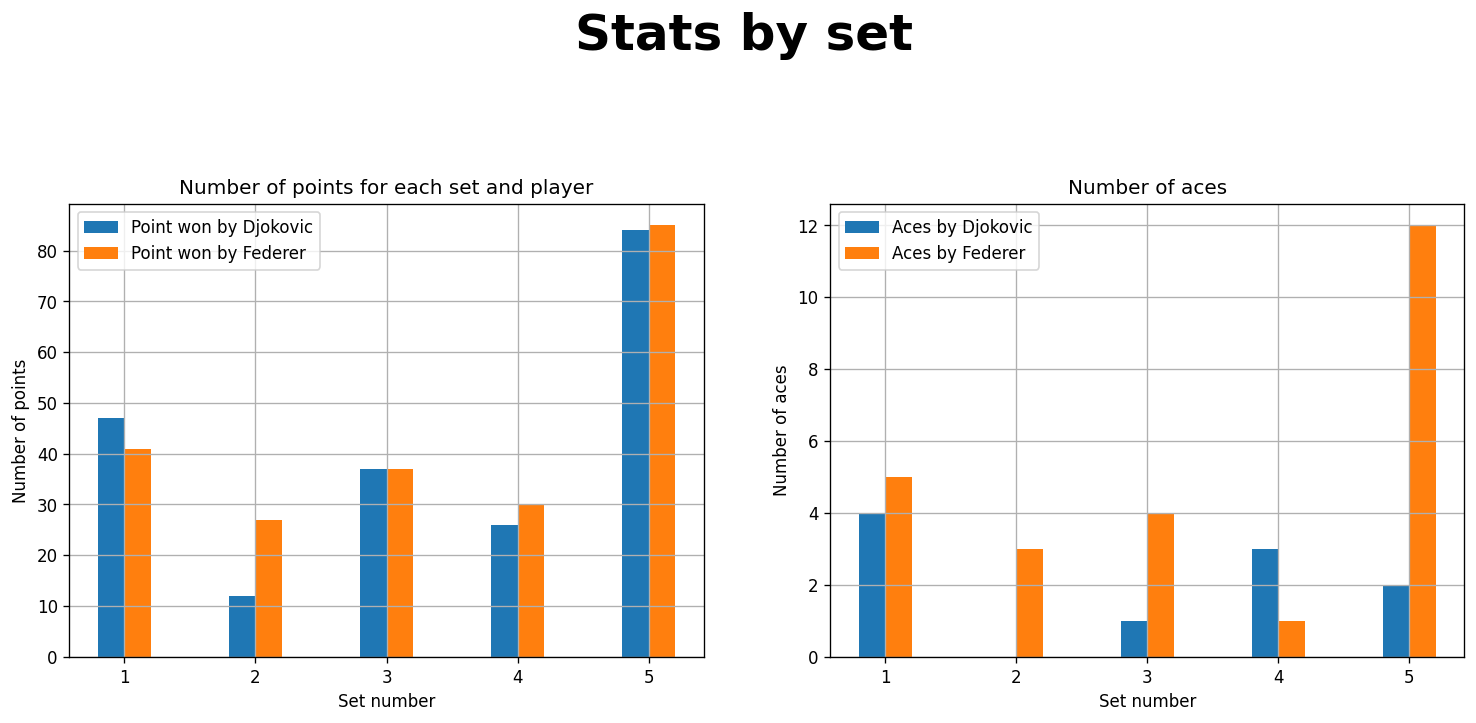

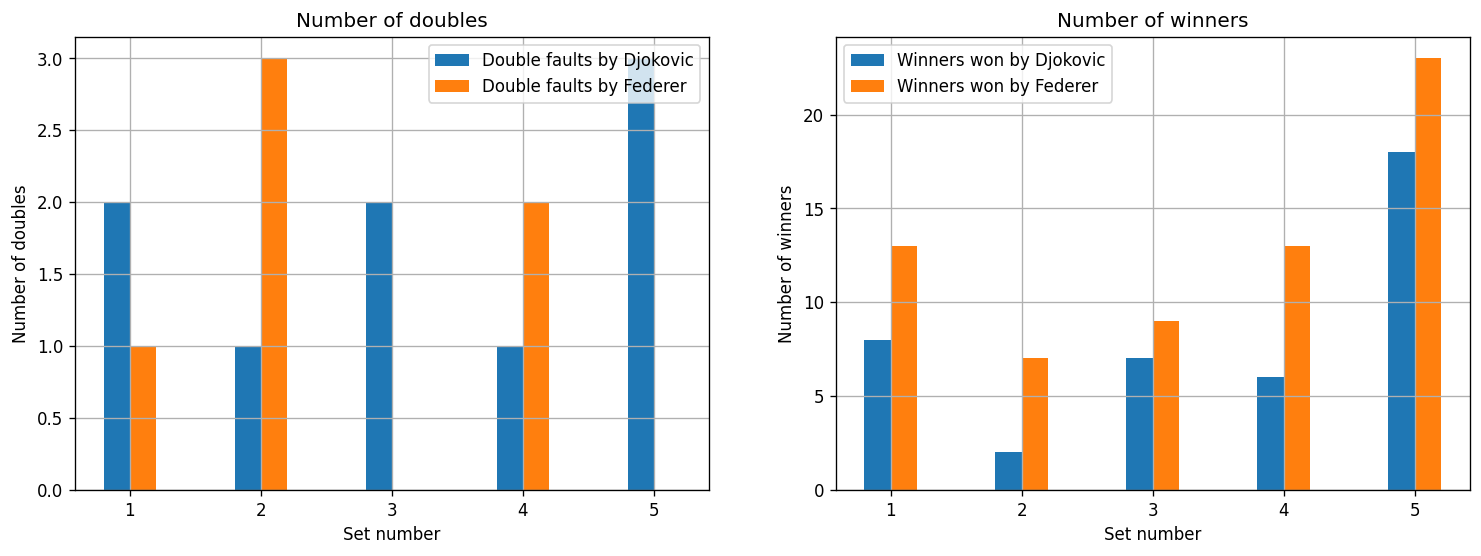

In [4]:
# Plot points won, aces, doubles and winners for each set

last = 0
points, aces, doubles, winners = [[], []], [[], []], [[], []], [[], []]
for i in range(len(set_ind)):
    # Set i
    
    
    points[0].append(0)
    points[1].append(0)

    aces[0].append(0)
    aces[1].append(0)

    doubles[0].append(0)
    doubles[1].append(0)

    winners[0].append(0)
    winners[1].append(0)
    
    
    for j in range(last,set_ind[i]+1):
        if (data["pt_won_by"][j] == 1):
            points[0][-1] += 1
        else:
            points[1][-1] += 1
            
        if (data["ace"][j] == 1):
            aces[0][-1] += 1
        elif (data["ace"][j] == 2):
            aces[1][-1] += 1
            
        if (data["double_fault"][j] == 1):
            doubles[0][-1] += 1
        elif (data["double_fault"][j] == 2):
            doubles[1][-1] += 1
            
        if (data["winner"][j] == 1):
            winners[0][-1] += 1
        elif (data["winner"][j] == 2):
            winners[1][-1] += 1
    last = set_ind[i]
    
# Plot points, aces, doubles and winners
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=120)
ax = axes.ravel()
plt.suptitle("\n".join(['Stats by set']), y=1.2, fontweight='bold', fontsize = 30)

sets = np.zeros(5)
for i in range(5):
    sets[i] = i + 1

ax[0].set_title('Number of points for each set and player')
ax[0].bar(sets-0.1, points[0], width=0.2, align='center')
ax[0].bar(sets+0.1, points[1], width=0.2, align='center')
ax[0].legend(labels=['Point won by Djokovic', 'Point won by Federer'], prop={'size': 10})
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Set number')
ax[0].grid()

ax[1].set_title('Number of aces')
ax[1].bar(sets-0.1, aces[0], width=0.2, align='center')
ax[1].bar(sets+0.1, aces[1], width=0.2, align='center')
ax[1].legend(labels=['Aces by Djokovic', 'Aces by Federer'], prop={'size': 10})
ax[1].set_ylabel('Number of aces')
ax[1].set_xlabel('Set number')
ax[1].grid()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=120)
ax = axes.ravel()

ax[0].set_title('Number of doubles')
ax[0].bar(sets-0.1, doubles[0], width=0.2, align='center')
ax[0].bar(sets+0.1, doubles[1], width=0.2, align='center')
ax[0].legend(labels=['Double faults by Djokovic', 'Double faults by Federer'], prop={'size': 10})
ax[0].set_ylabel('Number of doubles')
ax[0].set_xlabel('Set number')
ax[0].grid()

ax[1].set_title('Number of winners')
ax[1].bar(sets-0.1, winners[0], width=0.2, align='center')
ax[1].bar(sets+0.1, winners[1], width=0.2, align='center')
ax[1].legend(labels=['Winners won by Djokovic', 'Winners won by Federer'], prop={'size': 10})
ax[1].set_ylabel('Number of winners')
ax[1].set_xlabel('Set number')
ax[1].grid()

plt.show()

    
    

I found 5th set to be really suprising, as Djokovic didn't seem to perform very well at given plays but still won this set (especially with the number of aces). I then began to question myself in importance of these topics for match results and started looking somewhere else.

# Service

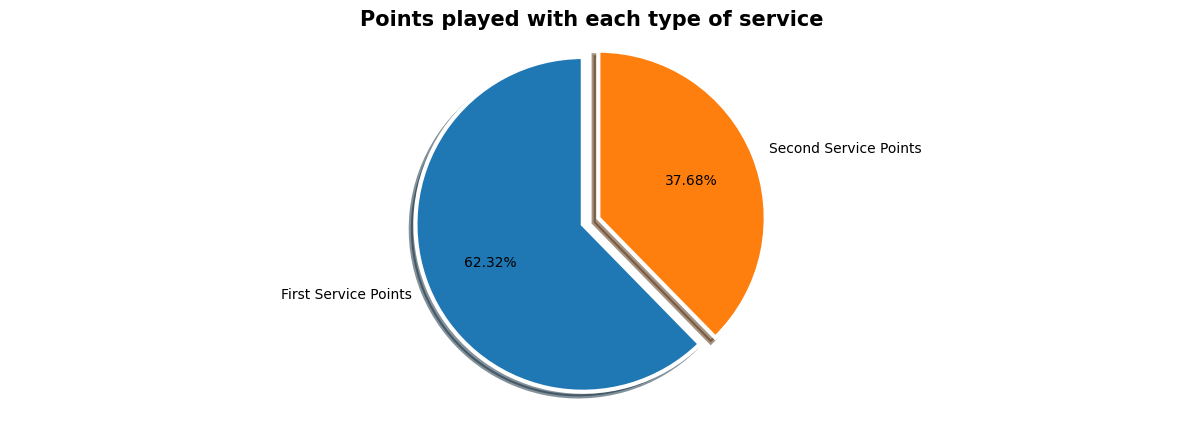

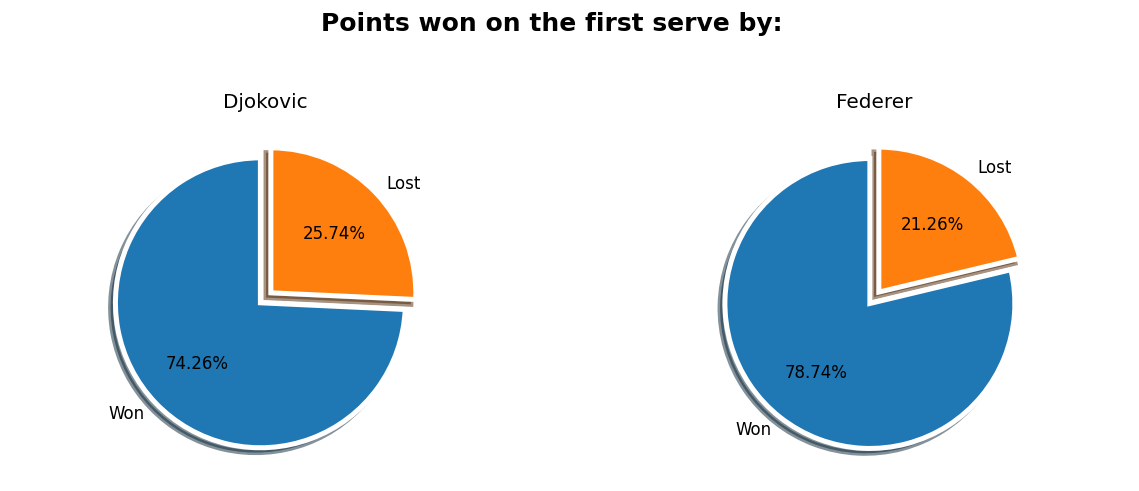

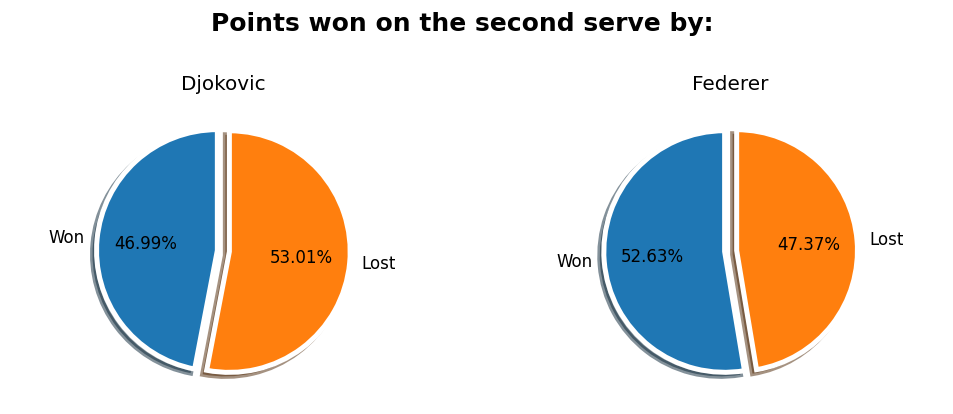

In [5]:
service_type = {}

first_service_cnt, second_service_cnt = 0, 0
first_service_won = np.zeros((3,2), dtype = int)
second_service_won = np.zeros((3,2), dtype = int)

serve_type = {}

for i in range(len(data["point_description"])):
    service_try = data["point_description"][i].split('.')
    player_str = data["server"][i]
    player = 1
    if (player_str == 'federer'):
        player = 2
    
    
    if (len(service_try) == 2):
        first_service_cnt += 1
        
        if (player == data["pt_won_by"][i]):
            first_service_won[player][0] += 1
        else:
            first_service_won[player][1] += 1
    else:
        serve_type[service_try[1].split(',')[0].split(';')[0]] = 0
        
        second_service_cnt += 1
        
        if (player == data["pt_won_by"][i]):
            second_service_won[player][0] += 1
        else:
            second_service_won[player][1] += 1

explode = (0.05, 0.05)

# Points played with each type of service
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15 ,5), dpi=100)
labels = 'First Service Points', 'Second Service Points'
ax1.pie([first_service_cnt, second_service_cnt], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.axis('equal')
ax1.set_title('Points played with each type of service', fontweight='bold', fontsize = 15)
plt.show()

# Points won on the first serve
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15 / 1.25,5 / 1.25), dpi=120)
ax = axes.ravel()
plt.suptitle("\n".join(['Points won on the first serve by:']), y=1.1, fontweight='bold', fontsize = 15)

labels = 'Won', 'Lost'
ax[0].axis('equal')
ax[0].set_title('Djokovic')
ax[0].pie([first_service_won[1][0], first_service_won[1][1]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

labels = 'Won', 'Lost'
ax[1].axis('equal')
ax[1].set_title('Federer')
ax[1].pie([first_service_won[2][0], first_service_won[2][1]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.show()

# Points won on the second serve
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15 / 1.5,5 / 1.5), dpi=120)
ax = axes.ravel()
plt.suptitle("\n".join(['Points won on the second serve by:']), y=1.1, fontweight='bold', fontsize = 15)

labels = 'Won', 'Lost'
ax[0].axis('equal')
ax[0].set_title('Djokovic')
ax[0].pie([second_service_won[1][0], second_service_won[1][1]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

labels = 'Won', 'Lost'
ax[1].axis('equal')
ax[1].set_title('Federer')
ax[1].pie([second_service_won[2][0], second_service_won[2][1]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.show()

As expected, first service has a big potential for winning the point. I am guessing, because of the fear of losing a point, the player which has the service serves a lot more carefully, thus losing on the attack and then the probability of winning notably decreases (p.s. this is a percentage calculation of won points by the player that has the service).

## Extending on the services

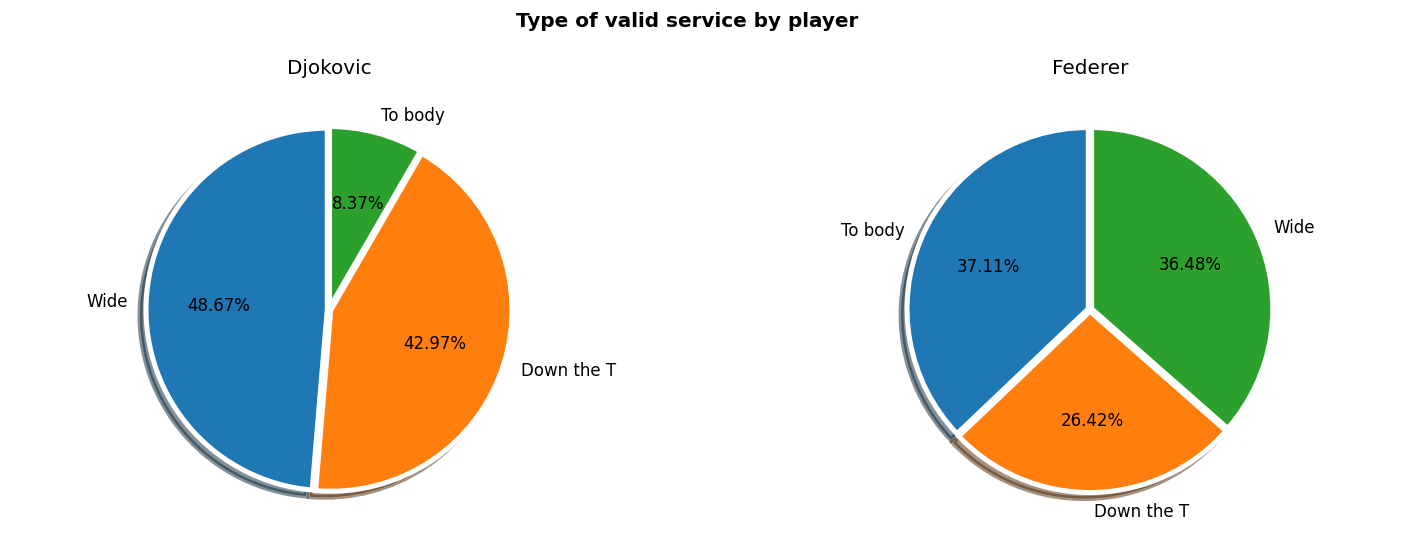

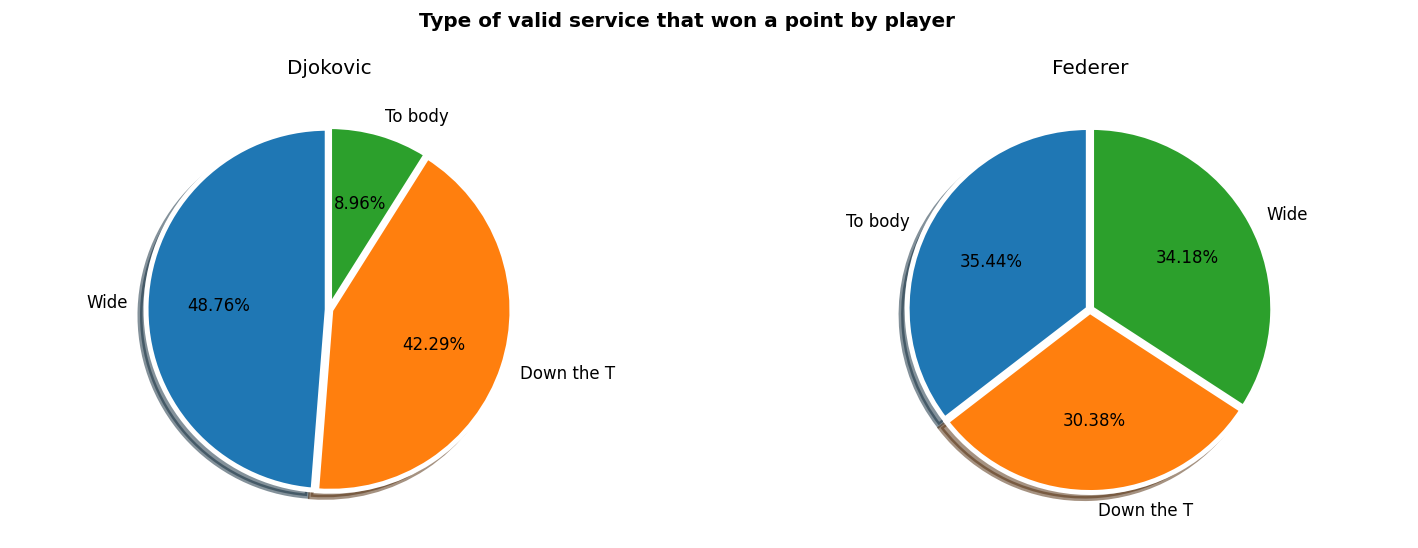

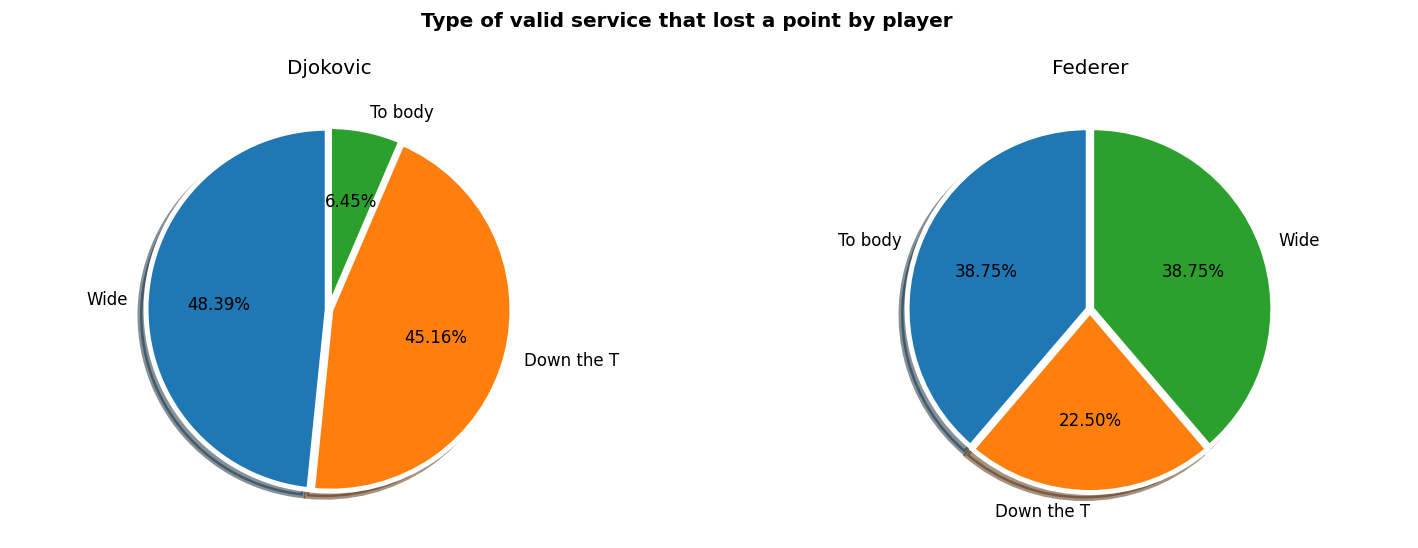

In [6]:
def initialize_service_type():
    for i in range(len(data["point_description"])):
        service_try = data["point_description"][i].split('.')
        if (len(service_try) == 2):
            serve_type[service_try[0].split(',')[0].split(';')[0]] = 0
        else:
            serve_type[service_try[1].split(',')[0].split(';')[0]] = 0

def service_stats_plot(spt):
    scores_first, scores_second = [], []
    labels_first, labels_second = [], []
    for i in serve_type:
        if i[0] == '1':
            lab = i[10:]
            lab[0].upper()
            lab = lab[0].upper() + lab[1:]
            
            labels_first.append(lab)
            scores_first.append(serve_type[i])
        else:
            lab = i[11:]
            lab = lab[0].upper() + lab[1:]
            
            labels_second.append(lab)
            scores_second.append(serve_type[i])
    
    # Pie for types of services
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15 / 1.0,5 / 1.0), dpi=120)
    ax = axes.ravel()
    plt.suptitle("\n".join([spt]), y=1.0, fontweight='bold')
    explode = (0.01, 0.01, 0.01)

    ax[0].axis('equal')
    ax[0].set_title('Djokovic')
    ax[0].pie(scores_first, labels=labels_first, autopct='%1.2f%%',
            explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

    
    ax[1].axis('equal')
    ax[1].set_title('Federer')
    ax[1].pie(scores_second, labels=labels_second, autopct='%1.2f%%',
            explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

    plt.show()


initialize_service_type()

# Calculate number of each service type
for i in range(len(data["point_description"])):
    service_try = data["point_description"][i].split('.')
    if (len(service_try) == 2):
        serve_type[service_try[0].split(',')[0].split(';')[0]] += 1
    else:
        serve_type[service_try[1].split(',')[0].split(';')[0]] += 1

service_stats_plot("Type of valid service by player")

initialize_service_type()

# Calculate number of each service type
for i in range(len(data["point_description"])):
    service_try = data["point_description"][i].split('.')
    player_str = data["server"][i]
    player = 1
    if (player_str == 'federer'):
        player = 2
        
    if (len(service_try) == 2 and player == data["pt_won_by"][i]):
        serve_type[service_try[0].split(',')[0].split(';')[0]] += 1
    elif (len(service_try) == 3 and player == data["pt_won_by"][i]):
        serve_type[service_try[1].split(',')[0].split(';')[0]] += 1
        
service_stats_plot("Type of valid service that won a point by player")

initialize_service_type()

# Calculate number of each service type
for i in range(len(data["point_description"])):
    service_try = data["point_description"][i].split('.')
    player_str = data["server"][i]
    player = 1
    if (player_str == 'federer'):
        player = 2
        
    if (len(service_try) == 2 and player != data["pt_won_by"][i]):
        serve_type[service_try[0].split(',')[0].split(';')[0]] += 1
    elif (len(service_try) == 3 and player != data["pt_won_by"][i]):
        serve_type[service_try[1].split(',')[0].split(';')[0]] += 1
        
service_stats_plot("Type of valid service that lost a point by player")

I found services interesting, so I delt with them in a much more detailed way. I wanted to know preferences of services by each player, and results were really interesting. I found that Djokovic doesn't like service to the body, but Federer is much more consistent on diversity of his services. Next up, I wanted to finish this story of services with a little twist. I always looked for something good about their play, but now idea came to mind that maybe the errors are much more important part of the story.

## Service Faults 

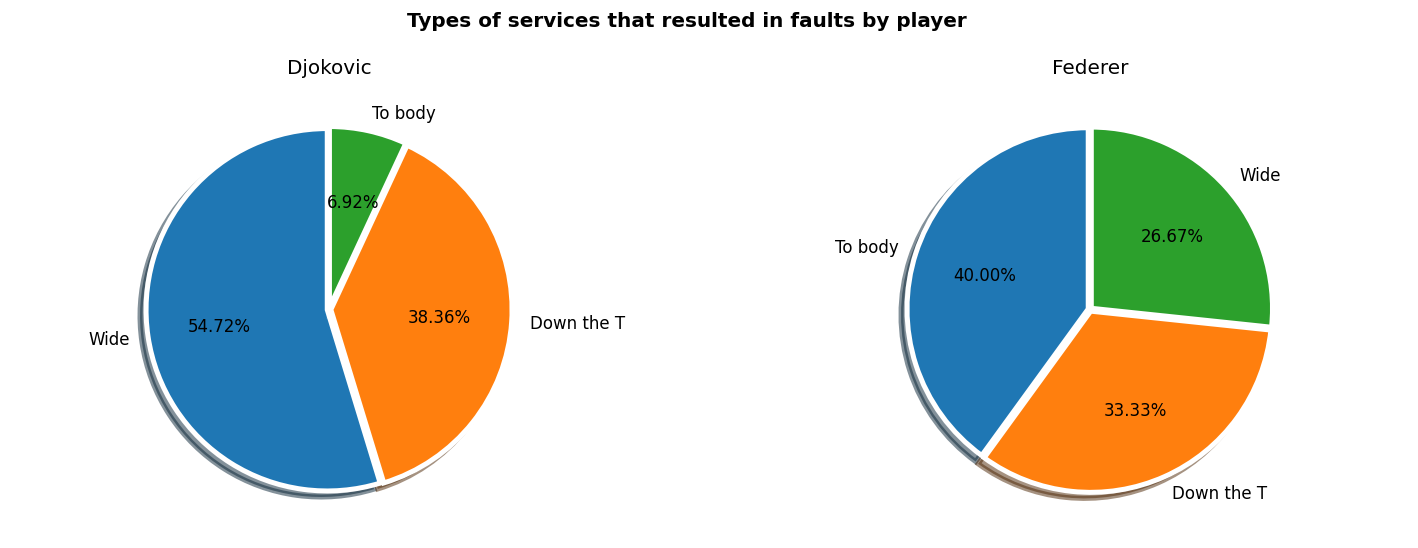

In [7]:
initialize_service_type()

# Calculate number of each service type
for i in range(len(data["point_description"])):
    service_try = data["point_description"][i].split('.')
    player_str = data["server"][i]
    player = 1
    if (player_str == 'federer'):
        player = 2
        
    
    if (len(service_try) == 3):
        ff = service_try[0].split(',')
        if ("fault" in ff[1]):
            serve_type[service_try[0].split(',')[0].split(';')[0]] += 1
            
        sf = service_try[1].split(',')
        if (len(sf)>1 and "fault" in sf[1]):
            serve_type[service_try[1].split(',')[0].split(';')[0]] += 1
        
service_stats_plot("Types of services that resulted in faults by player")

I didn't found anything interesting in particular with the error side of the story. They relatively won points as much as they lost them on each type of the service. 

I thought that now is the time for extending this analysis on another part of the match, and that is type of plays for each players, identifying strengths and weaknesses of the player's backhands and forehands.

# Backhands and Forehands

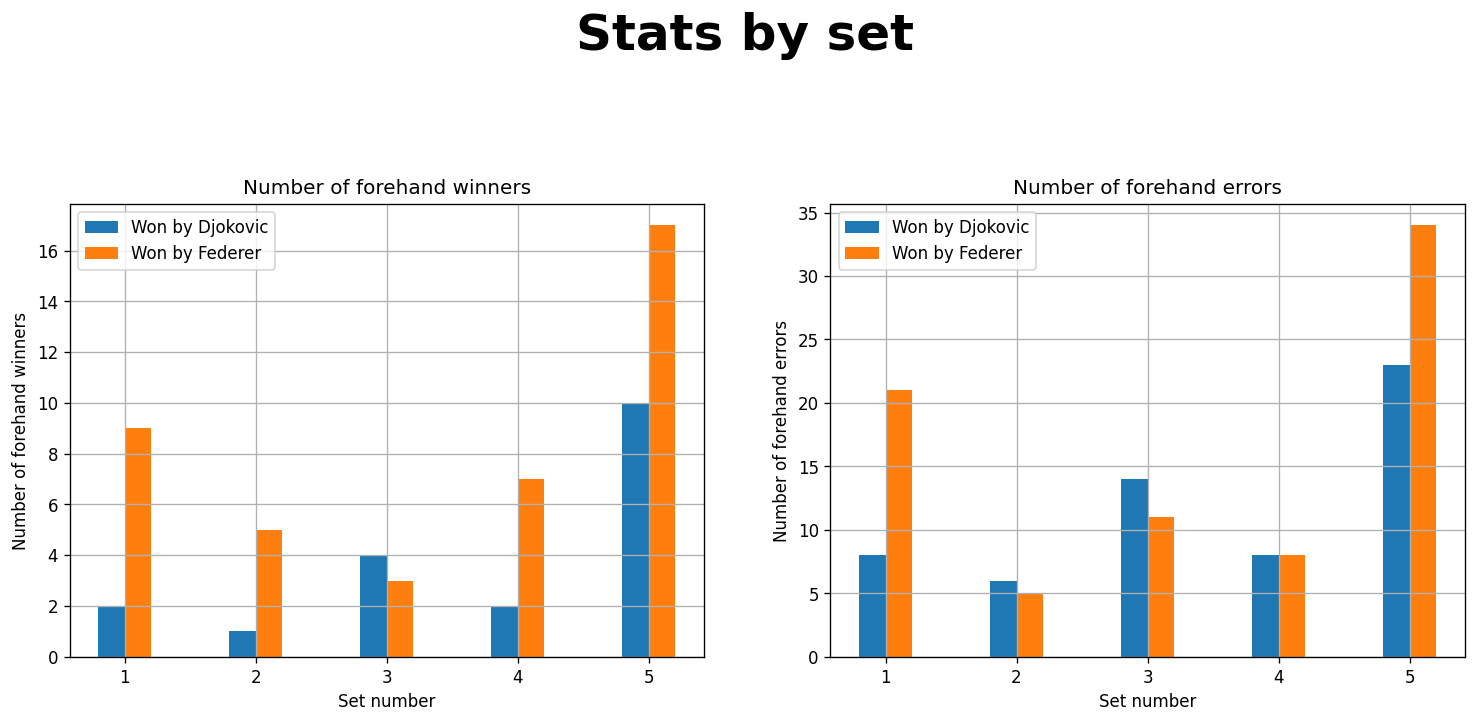

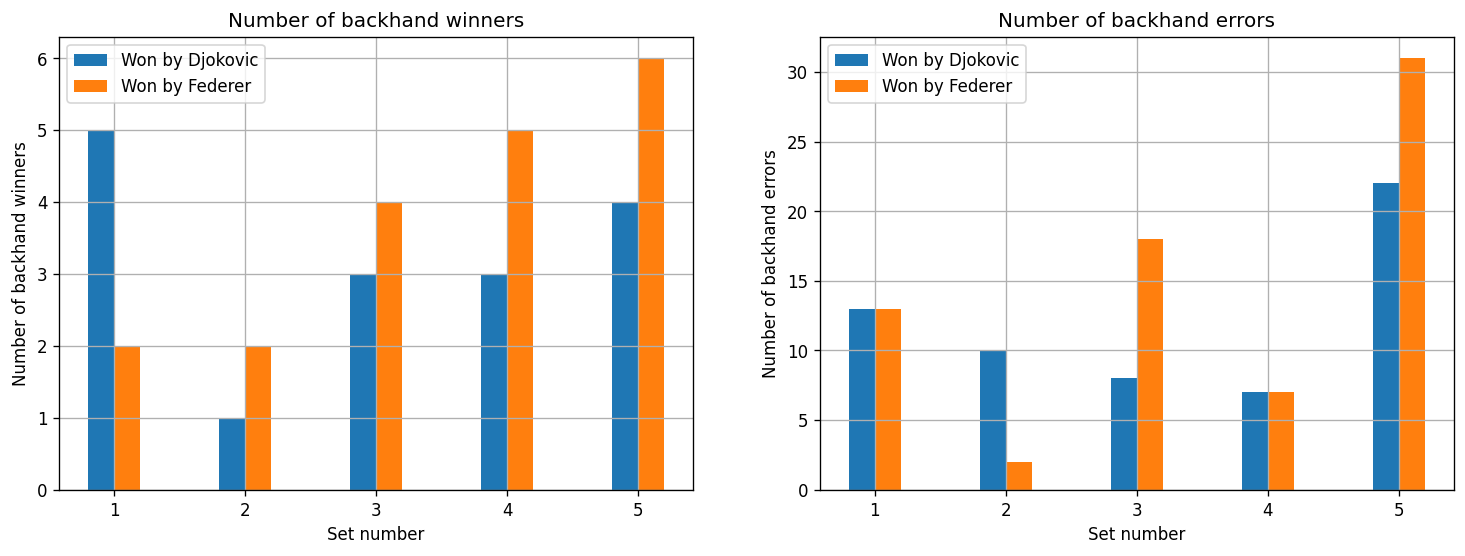

In [8]:
# Plot points won, aces, doubles and winners for each set

last = 0
forehand_winner, forehand_error, backhand_winner, backhand_error = [[], []], [[], []], [[], []], [[], []]
for i in range(len(set_ind)):
    # Set i
    
    
    forehand_winner[0].append(0)
    forehand_winner[1].append(0)

    forehand_error[0].append(0)
    forehand_error[1].append(0)

    backhand_winner[0].append(0)
    backhand_winner[1].append(0)

    backhand_error[0].append(0)
    backhand_error[1].append(0)
    
    
    for j in range(last,set_ind[i]+1):
        if (data["forehand_winner"][j] == 1):
            forehand_winner[0][-1] += 1
        elif (data["forehand_winner"][j] == 2):
            forehand_winner[1][-1] += 1
            
        if (data["forehand_error"][j] == 1):
            forehand_error[0][-1] += 1
        elif (data["forehand_error"][j] == 2):
            forehand_error[1][-1] += 1
            
        if (data["backhand_winner"][j] == 1):
            backhand_winner[0][-1] += 1
        elif (data["backhand_winner"][j] == 2):
            backhand_winner[1][-1] += 1
            
        if (data["backhand_error"][j] == 1):
            backhand_error[0][-1] += 1
        elif (data["backhand_error"][j] == 2):
            backhand_error[1][-1] += 1
    last = set_ind[i]
    
# Plot backhand and frontend statistics by set

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=120)
ax = axes.ravel()
plt.suptitle("\n".join(['Stats by set']), y=1.2, fontweight='bold', fontsize = 30)

sets = np.zeros(5)
for i in range(5):
    sets[i] = i + 1

ax[0].set_title('Number of forehand winners')
ax[0].bar(sets-0.1, forehand_winner[0], width=0.2, align='center')
ax[0].bar(sets+0.1, forehand_winner[1], width=0.2, align='center')
ax[0].legend(labels=['Won by Djokovic', 'Won by Federer'], prop={'size': 10})
ax[0].set_ylabel('Number of forehand winners')
ax[0].set_xlabel('Set number')
ax[0].grid()

ax[1].set_title('Number of forehand errors')
ax[1].bar(sets-0.1, forehand_error[0], width=0.2, align='center')
ax[1].bar(sets+0.1, forehand_error[1], width=0.2, align='center')
ax[1].legend(labels=['Won by Djokovic', 'Won by Federer'], prop={'size': 10})
ax[1].set_ylabel('Number of forehand errors')
ax[1].set_xlabel('Set number')
ax[1].grid()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=120)
ax = axes.ravel()

ax[0].set_title('Number of backhand winners')
ax[0].bar(sets-0.1, backhand_winner[0], width=0.2, align='center')
ax[0].bar(sets+0.1, backhand_winner[1], width=0.2, align='center')
ax[0].legend(labels=['Won by Djokovic', 'Won by Federer'], prop={'size': 10})
ax[0].set_ylabel('Number of backhand winners')
ax[0].set_xlabel('Set number')
ax[0].grid()

ax[1].set_title('Number of backhand errors')
ax[1].bar(sets-0.1, backhand_error[0], width=0.2, align='center')
ax[1].bar(sets+0.1, backhand_error[1], width=0.2, align='center')
ax[1].legend(labels=['Won by Djokovic', 'Won by Federer'], prop={'size': 10})
ax[1].set_ylabel('Number of backhand errors')
ax[1].set_xlabel('Set number')
ax[1].grid()

plt.show()

Federer outplays Djokovic in both winners and erros, but overall I think he outplayed him in this part of the match also. I just wanted to make sure that in the next part, I calculated sum of all sets to determine that.

## Extending on backhand and forehand statistics

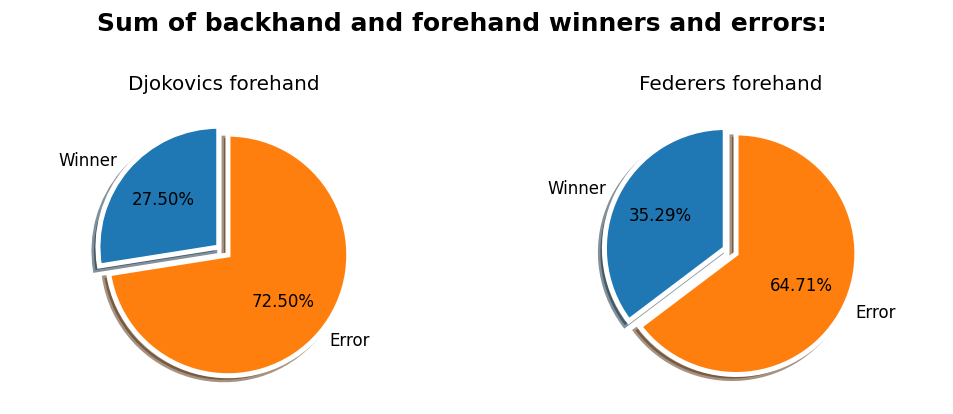

In [9]:
forehand_winner_sum, forehand_error_sum, backhand_winner_sum, backhand_error_sum = [], [], [], []

# Calculate sum of backhands and forehands (errors and winners)
for i in range(2):
    forehand_winner_sum.append(0)
    forehand_error_sum.append(0)
    backhand_winner_sum.append(0)
    backhand_error_sum.append(0)
    
    for j in range(len(forehand_winner)):
        forehand_winner_sum[i] += forehand_winner[j][i]
        forehand_error_sum[i] += forehand_error[j][i]
        backhand_winner_sum[i] += backhand_winner[j][i]
        backhand_error_sum[i] += backhand_error[j][i]

# Plot sum of backhands and forehands (errors and winners)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15 / 1.5,5 / 1.5), dpi=120)
ax = axes.ravel()
plt.suptitle("\n".join(['Sum of backhand and forehand winners and errors:']), y=1.1, fontweight='bold', fontsize = 15)
explode = (0.05, 0.05)
labels = 'Winner', 'Error'
ax[0].axis('equal')
ax[0].set_title('Djokovics forehand')
ax[0].pie([forehand_winner_sum[0], forehand_error_sum[0]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

labels = 'Winner', 'Error'
ax[1].axis('equal')
ax[1].set_title('Federers forehand')
ax[1].pie([forehand_winner_sum[1],  forehand_error_sum[1]], labels=labels, autopct='%1.2f%%',
        explode = explode, shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.show()

And my guess was correct, but not with a big difference.

For the final part of the project, I wanted to focus a bit more on the errors by each set, as I gave a lot of time exploring strengths of the players.

# Errors

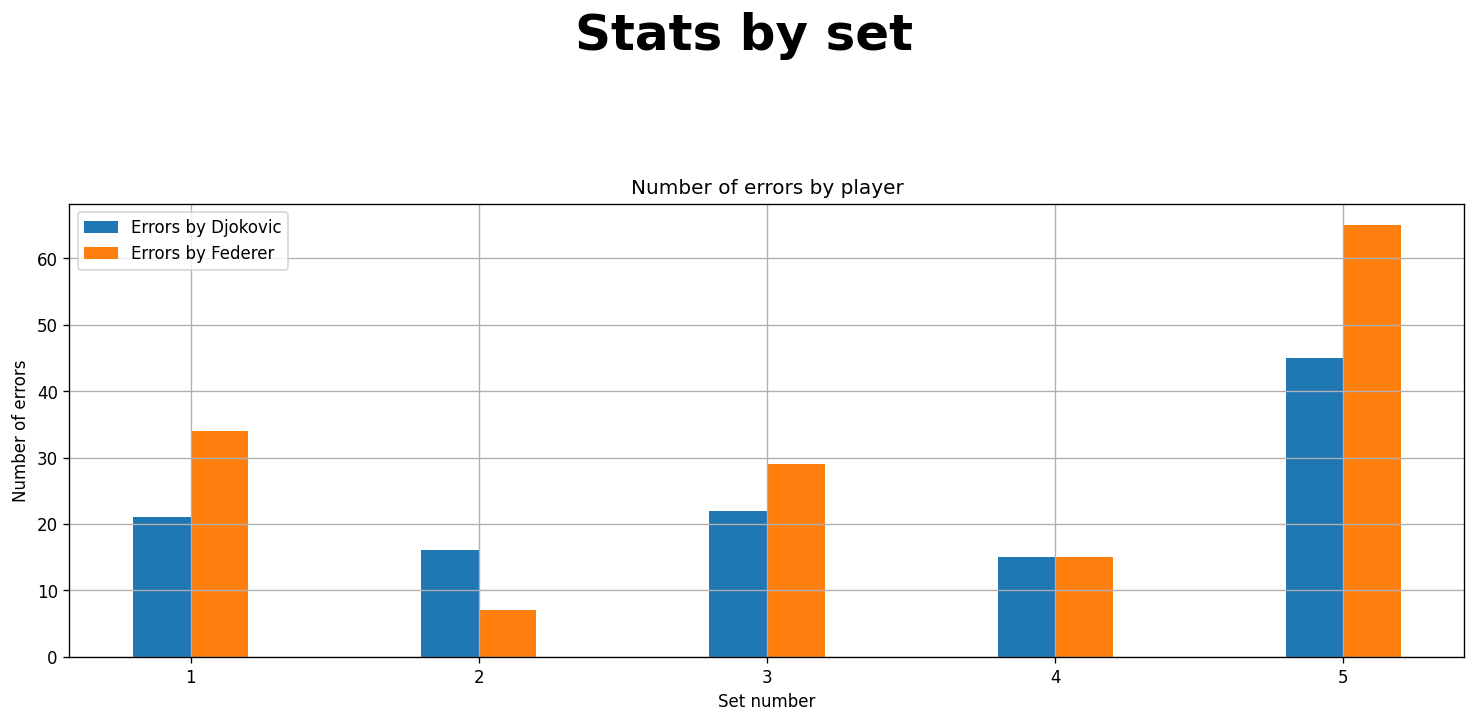

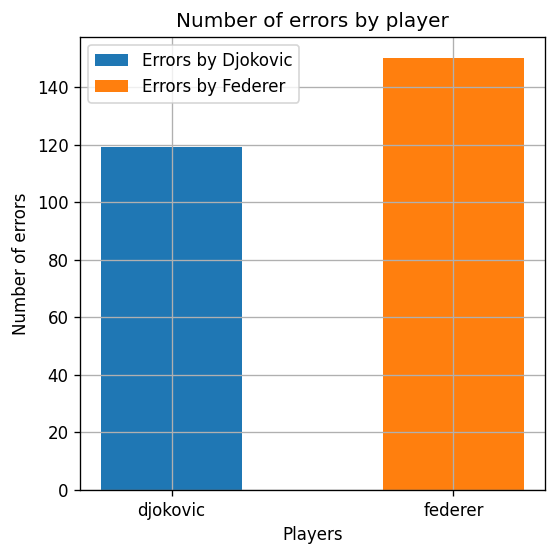

In [10]:
last = 0
error = [[],[]]
error_sum = [0, 0]
for i in range(len(set_ind)):
    # Set i
    error[0].append(0)
    error[1].append(0)    
    
    for j in range(last,set_ind[i]+1):
        if (data["error"][j] == 1):
            error[0][-1] += 1
            error_sum[0] += 1
        elif (data["error"][j] == 2):
            error[1][-1] += 1
            error_sum[1] += 1
    last = set_ind[i]

# Plot errors by set

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120)
plt.suptitle("\n".join(['Stats by set']), y=1.2, fontweight='bold', fontsize = 30)

sets = np.zeros(5)
for i in range(5):
    sets[i] = i + 1

axes.set_title('Number of errors by player')
axes.bar(sets-0.1, error[0], width=0.2, align='center')
axes.bar(sets+0.1, error[1], width=0.2, align='center')
axes.legend(labels=['Errors by Djokovic', 'Errors by Federer'], prop={'size': 10})
axes.set_ylabel('Number of errors')
axes.set_xlabel('Set number')
axes.grid()

plt.show()


# Plot sum of errors
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120)

sets = np.zeros(5)
for i in range(5):
    sets[i] = i + 1


axes.set_title('Number of errors by player')
axes.bar(players[0], error_sum[0], width = 0.5, align='center')
axes.bar(players[1], error_sum[1], width = 0.5, align='center')
axes.legend(labels=['Errors by Djokovic', 'Errors by Federer'], prop={'size': 10})
axes.set_ylabel('Number of errors')
axes.set_xlabel('Players')
axes.grid()

plt.show()

And we see one of the few things that Djokovic did better this match: Errors!

My guess that the gamebreaker for Federer was exactly his errors, and that they costed him this game.

# Corelation between rally length and player

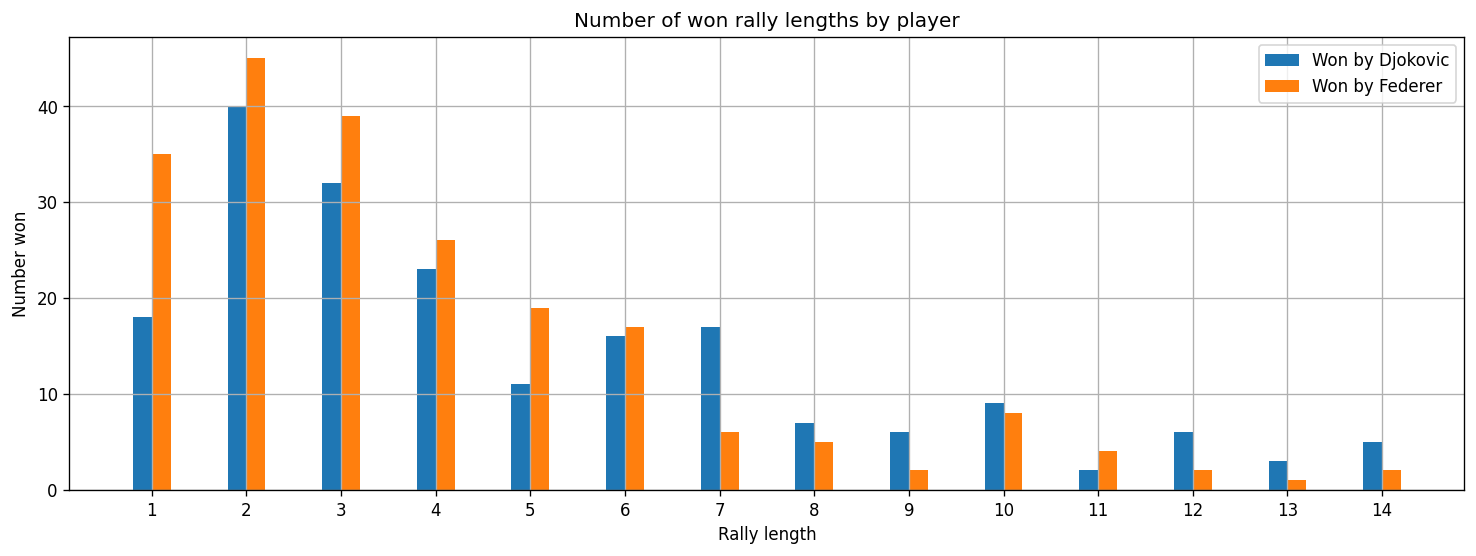

In [12]:
rally_player = [[], []]

# Biggest Rally Length is 35 but after extracting data I find it unimportant to look at the lengths >14
for i in range(1,15):
    dfi = data.loc[data["rally_length"] == i]
    p1 = dfi.loc[dfi["pt_won_by"] == 1].shape[0]
    p2 = dfi.loc[dfi["pt_won_by"] == 2].shape[0]
    
    rally_player[0].append(p1)
    rally_player[1].append(p2)
    
plt.figure(figsize=(15,5), dpi=120)

rally_length = np.arange(14) + 1

plt.title('Number of won rally lengths by player')
plt.bar(rally_length-0.1, rally_player[0], width=0.2, align='center')
plt.bar(rally_length+0.1, rally_player[1], width=0.2, align='center')
plt.legend(labels=['Won by Djokovic', 'Won by Federer'], prop={'size': 10})
plt.ylabel('Number won')
plt.xlabel('Rally length')
plt.grid("minor")
plt.xticks(rally_length, rally_length)

plt.show()

For the end, I wanted to compare duration of the points, but I didn't want to focus on the time itself, but rather on the number of rally's for each player. As we see, most of the points finished with less than 8 ball hits combined. There was few rally lengths after 14 but they were extremely rare so I didn't want to plot them on the graph.

# Conclusion

## About the game

As far as the game goes, it was relatively even match, Federer outperformed Djokovic on the 2nd set, and 5th was a struggle for both of them, but Djokovic managed to get away with it, claiming victory over Federer. After exploring I came to a realisation that Federer's loss can be mostly attributed to the number of errors he made during the game, because except that and few other smaller things, there isn't very much that Federer didn't "won" compared to Djokovic.

## What's next?

There is a few problems with the code, mostly vectorisation of it. I wrote something much more complex than I should've and that will take time to fix. Except that, one can continue with the data exploration and find something that I wasn't able to discover. There is so much more that one can try to determine and calculate.